In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("impressions.сsv")

In [4]:
df['event_datetime_m'] = pd.to_datetime(df.event_datetime_m, yearfirst = True)
df['year'] = [d.year for d in df.event_datetime_m]
df['month'] = [d.month for d in df.event_datetime_m]
df['dayofweek'] = [d.isoweekday() for d in df.event_datetime_m]
df['day'] = [d.day for d in df.event_datetime_m]
df['hour'] = [d.hour for d in df.event_datetime_m]

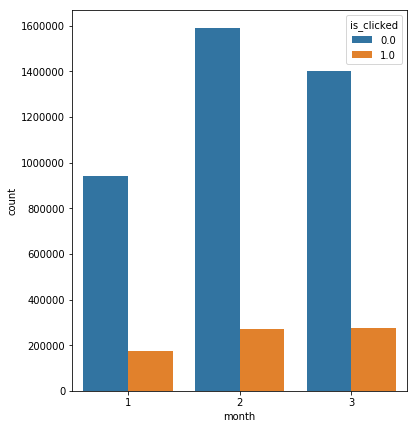

In [9]:
year_df = df[['year'] + ['month'] + ['is_clicked']]
plt.rcParams['figure.figsize'] = (6, 7)
ax = sns.countplot(x="month", hue="is_clicked", data=year_df)

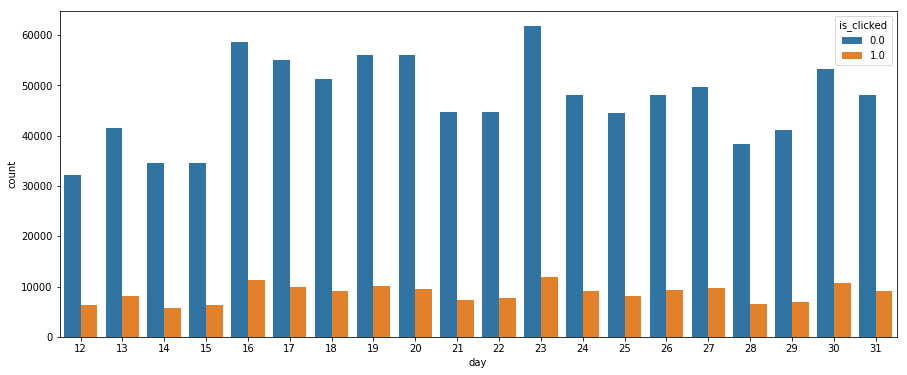

In [10]:
month_df = df[['month'] + ['day'] + ['is_clicked']]
plt.rcParams['figure.figsize'] = (15, 6)
ax = sns.countplot(x='day', hue="is_clicked", data=month_df[month_df.month==1])

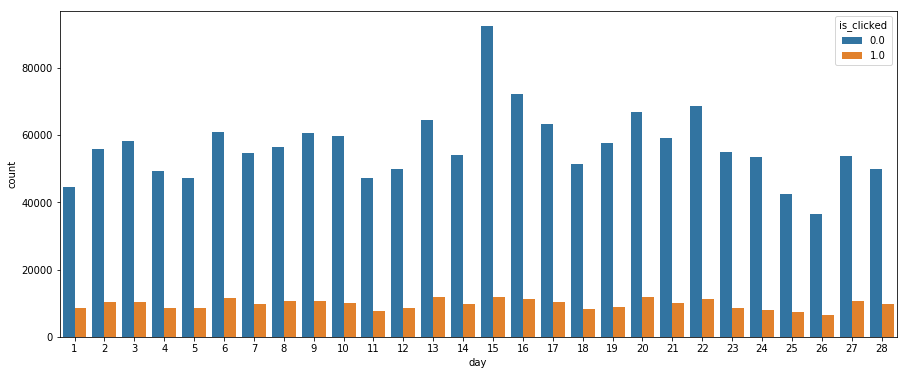

In [11]:
ax = sns.countplot(x='day', hue="is_clicked", data=month_df[month_df.month==2])

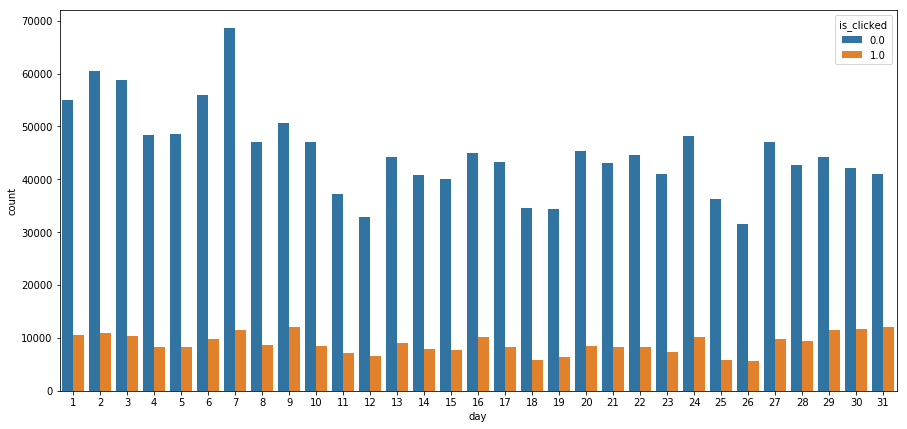

In [12]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.countplot(x='day', hue="is_clicked", data=month_df[month_df.month==3])

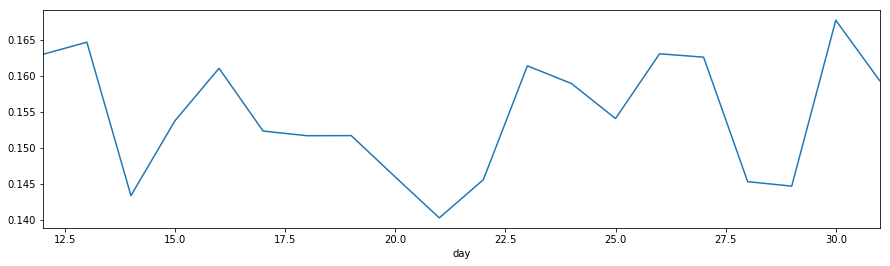

In [13]:
data = month_df[month_df.month==1].drop(['month'], axis=1)
data = data.set_index('day')
plt.rcParams['figure.figsize'] = (15, 4)
data = data.groupby(data.index, axis=0)['is_clicked'].mean()
data.plot()

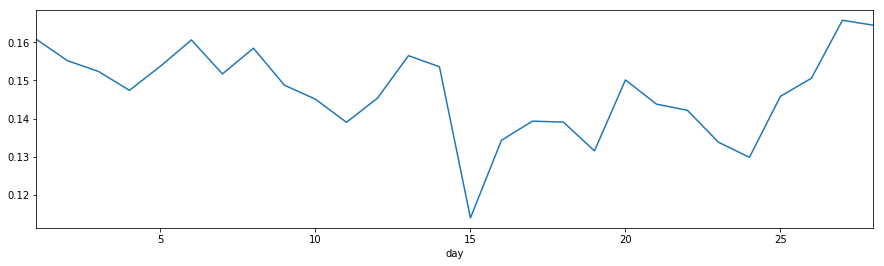

In [14]:
data = month_df[month_df.month==2].drop(['month'], axis=1)
data = data.set_index('day')
data = data.groupby(data.index, axis=0)['is_clicked'].mean()
data.plot()

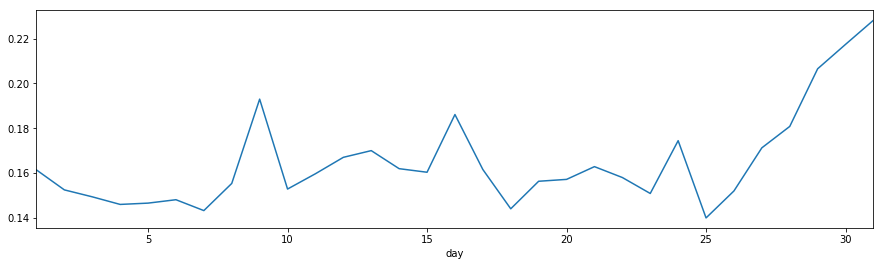

In [15]:
data = month_df[month_df.month==3].drop(['month'], axis=1)
data = data.set_index('day')
data = data.groupby(data.index, axis=0)['is_clicked'].mean()
data.plot()

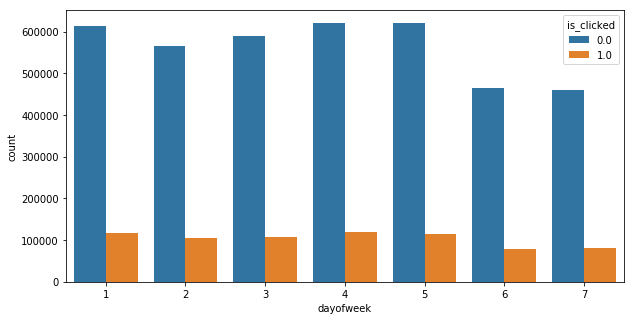

In [83]:
month_df = df[['month'] + ['dayofweek'] + ['is_clicked']]
plt.rcParams['figure.figsize'] = (10, 5)
ax = sns.countplot(x='dayofweek', hue="is_clicked", data=month_df)

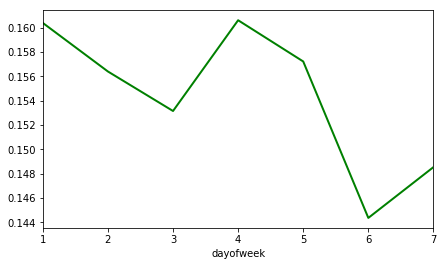

In [101]:
plt.rcParams['figure.figsize'] = (7, 4)
month_df.groupby(['dayofweek'])['is_clicked'].mean().plot(color='green',  lw=2, ls='solid')

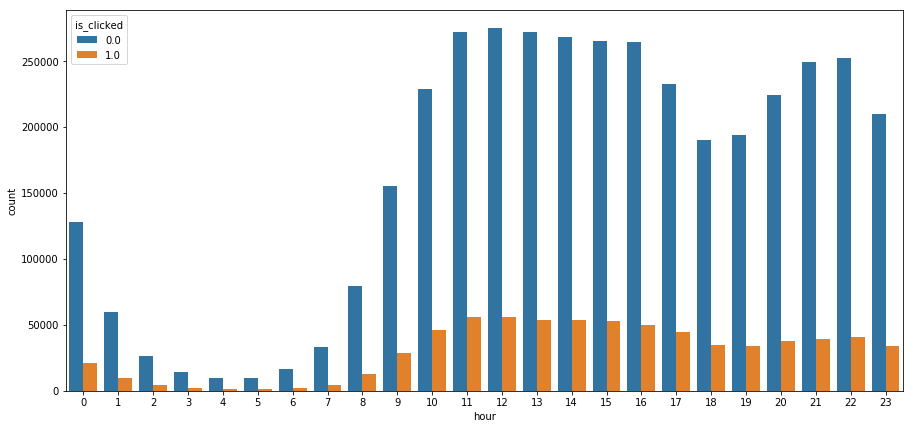

In [6]:
year_df = df[['hour']  + ['is_clicked'] + ['year']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.countplot(x="hour", hue="is_clicked", data=year_df)

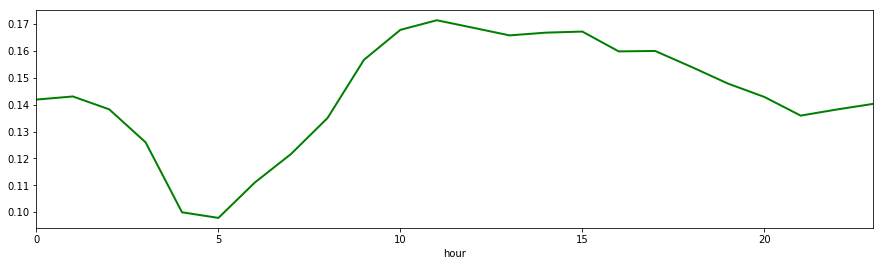

In [8]:
plt.rcParams['figure.figsize'] = (15, 4)
year_df.groupby(['hour'])['is_clicked'].mean().plot(color='green',  lw=2, ls='solid')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


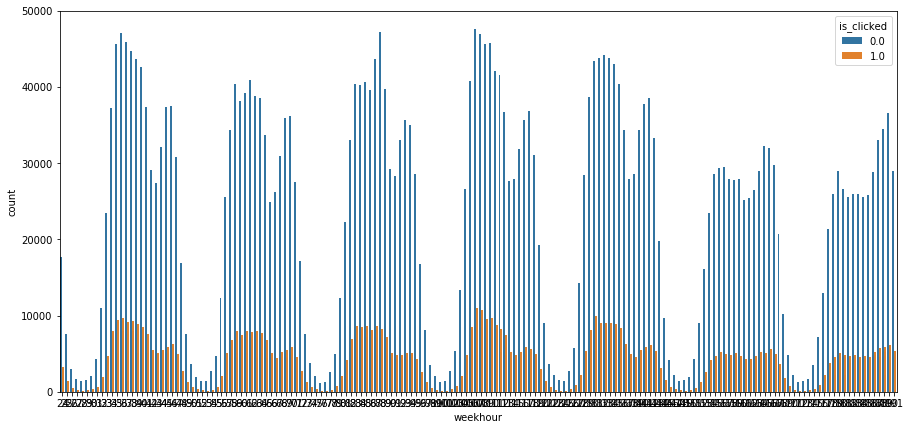

In [8]:
time_df = df[['hour'] + ['is_clicked'] + ['dayofweek']]
time_df['weekhour'] = time_df['dayofweek']*7 + time_df['hour']
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.countplot(x="weekhour", hue="is_clicked", data=time_df)

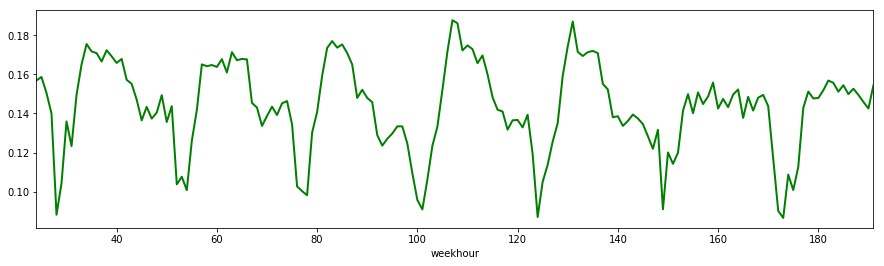

In [10]:
plt.rcParams['figure.figsize'] = (15, 4)
time_df.groupby(['weekhour'])['is_clicked'].mean().plot(color='green',  lw=2, ls='solid')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


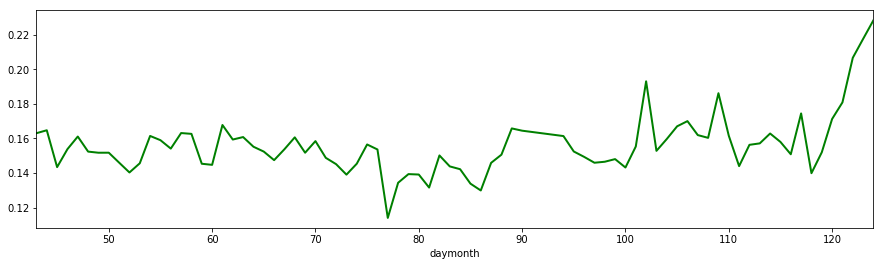

In [7]:
month_df = df[['month'] + ['day'] + ['is_clicked']]
month_df['daymonth'] = month_df['month']*31 + month_df['day']
plt.rcParams['figure.figsize'] = (15, 4)
month_df.groupby(['daymonth'])['is_clicked'].mean().plot(color='green',  lw=2, ls='solid')

[[  3.04766645e-04  -5.47616117e+01]
 [ -5.47616117e+01   1.42037206e+08]]


-0.2632033690265449

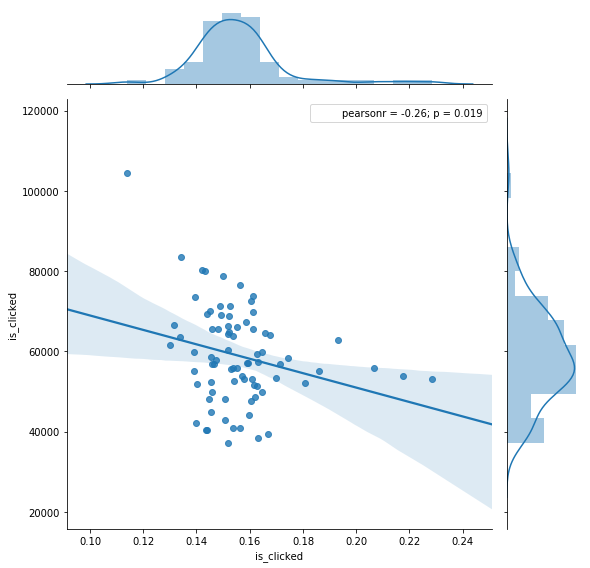

In [47]:
a = month_df.groupby(['daymonth'])['is_clicked'].mean()
b = month_df.groupby(['daymonth'])['is_clicked'].count()
g = sns.jointplot(a, b, kind="reg", size=8)
print(np.cov(a,b))
np.corrcoef(a, b)[1,0]

Такая вот петрушка

In [19]:
tdf = pd.read_csv('test.csv', index_col="id")

/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
tdf['event_datetime_m'] = pd.to_datetime(tdf.event_datetime_m, yearfirst = True)
tdf['year'] = [d.year for d in tdf.event_datetime_m]
tdf['month'] = [d.month for d in tdf.event_datetime_m]
tdf['dayofweek'] = [d.isoweekday() for d in tdf.event_datetime_m]
tdf['day'] = [d.day for d in tdf.event_datetime_m]
tdf['hour'] = [d.hour for d in tdf.event_datetime_m]

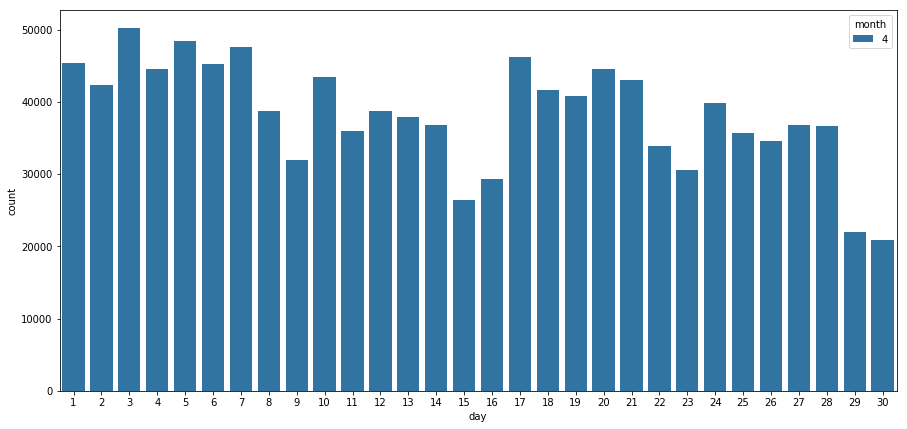

In [82]:
month_tdf = tdf[['month'] + ['day']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.countplot(x='day', hue="month", data=month_tdf)

In [11]:
df.groupby(['year'])['is_clicked'].mean()

year
2017    0.15501
Name: is_clicked, dtype: float64

In [33]:
def write_to_submission_file(predicted_labels, out_file,
                             target='answer', index_label="id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(0, predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [58]:
tdf['answer'] = 0.15501*np.ones(shape=tdf.shape[0])
write_to_submission_file(tdf['answer'], 'prediction.csv')

Теперь с dayhour

In [18]:
time_df = df[['hour'] + ['is_clicked'] + ['dayofweek']]
time_df['weekhour'] = time_df['dayofweek']*24 + time_df['hour']
weekhour = time_df.groupby(['weekhour'])['is_clicked'].mean()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
tdf['weekhour'] = tdf['dayofweek']*24 + tdf['hour']
tdf['answer'] = [weekhour[i] for i in tdf['weekhour']]

,rank,event_datetime_m,id_show,id_user,year,month,dayofweek,day,hour,weekhour,is_clicked,answer
id,,,,,,,,,,,,
0,2,2017-04-12 23:03:00,22286,6235895,2017,4,3,12,23,95,0.129733,0.129733
1,4,2017-04-12 21:58:00,22286,6235895,2017,4,3,12,21,93,0.123530,0.123530
2,4,2017-04-12 22:02:00,22286,6235895,2017,4,3,12,22,94,0.127038,0.127038
3,2,2017-04-12 22:54:00,22286,6235895,2017,4,3,12,22,94,0.127038,0.127038
4,3,2017-04-12 22:02:00,15994,6235895,2017,4,3,12,22,94,0.127038,0.127038


In [36]:
write_to_submission_file(tdf['answer'], 'prediction.csv')
tdf['answer'].mean()

0.15446997573827043

ещё чутка

In [20]:
df = pd.read_csv("clicks_no_impressions.сsv")

KeyboardInterrupt: 

In [ ]:
df['event_datetime_m'] = pd.to_datetime(df.event_datetime_m, yearfirst = True)
df['year'] = [d.year for d in df.event_datetime_m]
df['month'] = [d.month for d in df.event_datetime_m]
df['dayofweek'] = [d.isoweekday() for d in df.event_datetime_m]
df['day'] = [d.day for d in df.event_datetime_m]
df['hour'] = [d.hour for d in df.event_datetime_m]

In [ ]:
df.drop(['hour', 'event_datetime_m', 'id_show', 'id_user'])
plt.rcParams['figure.figsize'] = (6, 7)
ax = sns.countplot(x="month", hue="year", data=df)